a)
<img src="fig12a.png">

b)
$$ x_f = x_0 + \dot{x_0}t + \frac{1}{2}\ddot{x}t^2 $$

$$ y_f = y_0 + \dot{y_0}t + \frac{1}{2}\ddot{y}t^2 $$

c)
$$ x_f = x_0 + \dot{x_0}t + \frac{1}{2}\ddot{x}t^2 $$

$$ y_f = h_0 + \dot{y_0}t + \frac{1}{2}\ddot{y}t^2 $$

d)
$$ x_f = v_0cos\theta_0 t $$

where g = -9.81

$$ y_f = h_0 + v_0sin\theta_0 t + \frac{1}{2}gt^2 $$

e) 
$$\frac{dy(t)}{dt} = \dot{y(t)} = v_0cos\theta_0 + gt $$

$$ \dot{y(t_m)} = 0 = v_0cos\theta_0 + gt $$

$$ t_m = \frac{-v_0cos\theta_0}{g} $$

substitute $t_m$ into y(t)
 
$$ y(t_m) = h_0 - \frac{v_0^2sin\theta_0cos\theta_0}{g} - \frac{v_0^2cos^2\theta_0}{2g}$$

f)
$$ y(t_b) = 0 = h_0 + v_0sin\theta_0 t + \frac{1}{2}gt^2 $$

the old Pythagorean theorem

$$ t_b = \frac{-v_0sin\theta_0 \pm \sqrt{v_0^2sin^2\theta_0 - 2h_0g}}{g} $$

g)

$$ x_b = x(t_b) = v_0cos\theta_0(\frac{-v_0sin\theta_0 \pm \sqrt{v_0^2sin^2\theta_0 - 2h_0g}}{g}) $$

h)
cannot really go further analytically so we turn to good old numerics and start stuffing numbers in.

**I'm going to go ahead and abuse the power of computers here but it is not required to be able to solve for $v_0$**

In [1]:
from sympy import *
import sympy.physics.units as u
u.v = u.m/u.s
init_printing()

h0_c = 45
theta_c = -40
xb_c = 50
g_c = -9.81

xb, v0, theta, h0, g, tb= symbols("x_b v_0 theta_0 h_0 g t_b")

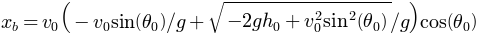

In [2]:
part_1 =(v0*cos(theta))
part_2 = (-v0*sin(theta))/g
part_sqrt = sqrt((v0*sin(theta))**2-(2*h0*g))/g
eq_1 = Eq(xb, part_1 * (part_2 + part_sqrt))
eq_1

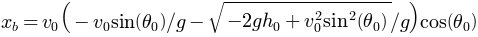

In [3]:
eq_2 = Eq(xb, part_1 * (part_2 - part_sqrt))
eq_2

In [4]:
_eq_1 = eq_1.subs(h0, h0_c)
_eq_1 = _eq_1.subs(g, g_c)
_eq_1 = _eq_1.subs(theta, theta_c)
_eq_1 = _eq_1.subs(xb, xb_c)
ans_1 = solve(_eq_1, v0)[0]
Eq(v0, ans_1*u.v)


In [5]:
_eq_2 = eq_2.subs(h0, h0_c)
_eq_2 = _eq_2.subs(g, g_c)
_eq_2 = _eq_2.subs(theta, theta_c)
_eq_2 = _eq_2.subs(xb, xb_c)
_eq_2
ans_2 = solve(_eq_2, v0)[0]
Eq(v0, ans_2*u.v)



** Note: This answer $\neq$ given answer of $\approx$ 76.57 given by the tutor...$ This one makes more sense though...**

it's important to remember under which domain the function is correct.

if $\theta \lt 0 \Rightarrow x_{max} = \frac{y}{tan\theta} $ 

### A bit of curiosity ###

So how much work would it take to solve the solution analytically???

Lets take a look how long it takes the computer ^^

Wall time: 2.94 s


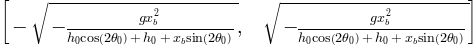

In [8]:
%time sol_1 = solve(eq_1, v0)
sol_1

Wall time: 2.79 s


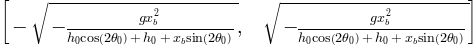

In [9]:
%time sol_2 = solve(eq_2, v0)
sol_2